# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
# TODO
df.shape[0]

400

Answer: 400

> ### Question 2.  Create a summary table.

In [6]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Gre has 2 missing, GPA has 2 missing, and prestige has 1 missing.

In [5]:
# TODO
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [24]:
# TODO
print('GRE variance is {}'.format(df.gre.var()))
print('GPA variance is {}'.format(df.gpa.var()))

GRE variance is 13390.606315
GPA variance is 0.144558345419


Answer: Comparing to GPA, which ranges from 2-4, GRE ranges from 200-800.  Larger numbers with wider ranges will have larger variances because the variance is the sum of difference between all observations minus the mean squared, divided by the total observation count.

> ### Question 4.  Drop data points with missing data.

In [9]:
# TODO
df=df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [12]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


In [13]:
# alternatively
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: the output from df.info() shows that all variable count matches the total record count of 397.  Or we can use df.isnull().sum() to see that all variables has no missing values.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

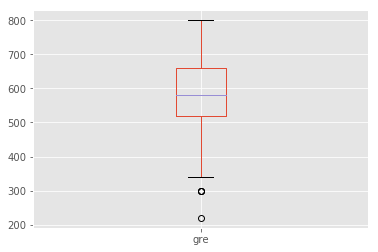

In [26]:
# TODO
df['gre'].plot.box()

GRE has 2 outliers, one at 300, and one at 225.

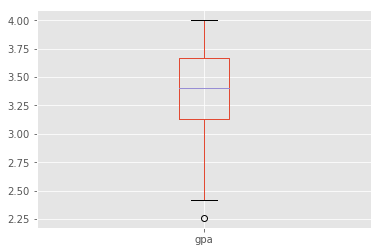

In [27]:
# TODO
df['gpa'].plot.box()

GPA has 1 outlier at 2.25.

> ### Question 7.  What do boxplots show?

Answer: Boxplots show us the 25, 50 and 75% range of a variable.  It also shows the upper (75% + 1.5IQR) and lower (25%-1.5IQR) bounds of the variable.  In addition, boxplot shows observations outside of the upper/lower bounds as possible outliers.

> ### Question 8.  Plot the distribution of each variable.

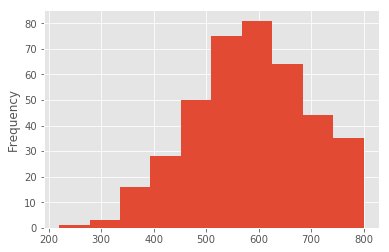

In [14]:
# TODO
df['gre'].plot.hist()

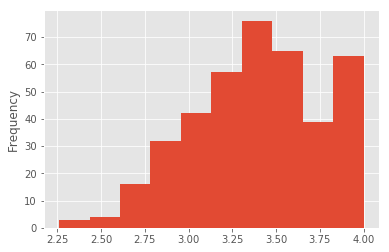

In [15]:
# TODO
df['gpa'].plot.hist()

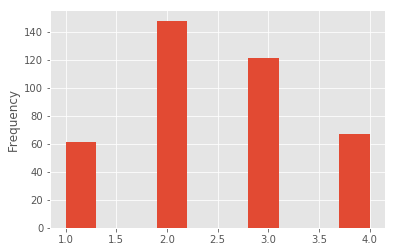

In [16]:
# TODO
df['prestige'].plot.hist()

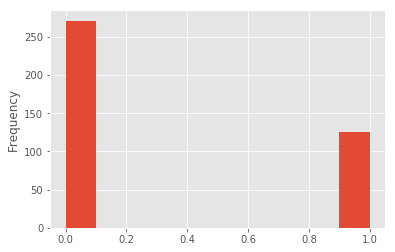

In [17]:
# TODO
df['admit'].plot.hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

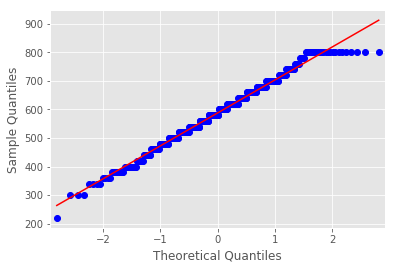

In [28]:
# TODO
sm.qqplot(df.gre, line = 's')

pass

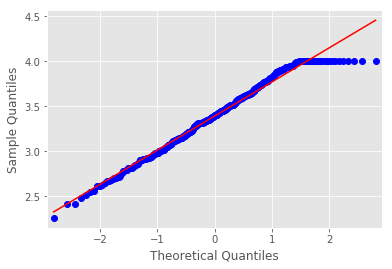

In [29]:
# TODO
sm.qqplot(df.gpa, line = 's')

pass

Answer: Both GRE and GPA are mostly normal, but skew towards the right.  This is especially true for GPA.  This means that there is a heavier than normal portion of students who scored near the max GRE, or had a near 4.0 GPA.

> ### Question 10.  Create a correlation matrix for the dataset.

In [4]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GRE and GPA are 38% correlated and are potentially colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

In [40]:
df.groupby('prestige').admit.mean()


prestige
1.0    0.540984
2.0    0.358108
3.0    0.231405
4.0    0.179104
Name: admit, dtype: float64

Answer: We can check the mean of admit, grouped by prestige.  Students from Prestige ranking of 1 has a higher chance of getting admitted to grad school.  ON the flip side, students from prestige ranking of 4 has the lowest chance of getting admitted to grad school.

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that GRE, GPA and prestige are all good predictors for admission success/failure.  